In [1]:
import pandas as pd
import numpy as np
import time
import os
import glob
import json
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = '../../../H3_csv'

In [4]:
files = glob.glob(DATA_DIR + '/*.csv')
files

['../../../H3_csv/exo_4_1_1.csv',
 '../../../H3_csv/exo_4_1_2.csv',
 '../../../H3_csv/exo_4_1_3.csv',
 '../../../H3_csv/exo_4_1_4.csv',
 '../../../H3_csv/exo_4_1_5.csv',
 '../../../H3_csv/exo_4_1_6.csv',
 '../../../H3_csv/exo_4_2_7.csv',
 '../../../H3_csv/exo_4_2_8.csv',
 '../../../H3_csv/exo_4_2_9.csv']

In [9]:
df = pd.read_csv(files[0], header=2, index_col=False)
df

,PC_time_[s],Exo_run_time_[ms],Capture_counter,Command_app,Exo_state,Right_hip_angle_[°],Right_knee_angle_[°],Right_ankle_angle_[°],Left_hip_angle_[°],Left_knee_angle_[°],...,Right_ankle_motor_torque_[Nm],Left_hip_motor_torque_[Nm],Left_knee_motor_torque_[Nm],Left_ankle_motor_torque_[Nm],Right_heel_pressure_value,Right_toe_pressure_value,Left_heel_pressure_value,Left_toe_pressure_value,Battery_voltage_[VDC],Trigger input
0,1.596769e+09,2481220,0,1,11,-19.1,-10.6,-1.7,-23.5,-9.6,...,0.3,-0.2,0.5,-0.8,137,0,0,17,19.8,1
1,1.596769e+09,2481230,0,1,11,-19.1,-10.6,-1.7,-23.5,-9.6,...,0.3,-0.2,0.5,-0.8,136,0,0,18,19.8,1
2,1.596769e+09,2481240,0,1,11,-19.1,-10.6,-1.7,-23.5,-9.6,...,0.3,-0.2,0.5,-0.8,136,0,0,18,19.8,1
3,1.596769e+09,2481250,0,1,11,-19.1,-10.6,-1.7,-23.5,-9.6,...,0.3,-0.2,0.5,-0.8,136,0,0,18,19.8,1
4,1.596769e+09,2481260,0,1,11,-19.1,-10.6,-1.7,-23.5,-9.6,...,0.3,-0.2,0.5,-0.8,135,0,0,18,19.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39745,1.596770e+09,2878670,0,1,11,-16.7,-0.3,4.3,-23.0,-9.4,...,0.3,-0.2,0.5,-0.8,47,0,4,0,19.8,0
39746,1.596770e+09,2878680,0,1,11,-16.7,-0.3,4.3,-23.0,-9.4,...,0.3,-0.2,0.5,-0.8,47,0,4,0,19.8,0
39747,1.596770e+09,2878690,0,1,11,-16.7,-0.3,4.3,-23.0,-9.4,...,0.3,-0.2,0.5,-0.8,47,0,4,0,19.8,0
39748,1.596770e+09,2878700,0,1,11,-16.7,-0.3,4.3,-23.0,-9.4,...,0.3,-0.2,0.5,-0.8,47,0,4,0,19.8,0


In [11]:
df.columns.tolist()

['PC_time_[s]',
 'Exo_run_time_[ms]',
 'Capture_counter',
 'Command_app',
 'Exo_state',
 'Right_hip_angle_[°]',
 'Right_knee_angle_[°]',
 'Right_ankle_angle_[°]',
 'Left_hip_angle_[°]',
 'Left_knee_angle_[°]',
 'Left_ankle_angle_[°]',
 'Right_hip_velocity_[°/s]',
 'Right_knee_velocity_[°/s]',
 'Right_ankle_velocity_[°/s]',
 'Left_hip_velocity_[°/s]',
 'Left_knee_velocity_[°/s]',
 'Left_ankle_velocity_[°/s]',
 'Right_hip_torque_sensor[Nm]',
 'Right_knee_torque_sensor[Nm]',
 'Right_ankle_torque_sensor[Nm]',
 'Left_hip_torque_sensor[Nm]',
 'Left_knee_torque_sensor[Nm]',
 'Left_ankle_torque_sensor[Nm]',
 'Right_hip_motor_torque_[Nm]',
 'Right_knee_motor_torque_[Nm]',
 'Right_ankle_motor_torque_[Nm]',
 'Left_hip_motor_torque_[Nm]',
 'Left_knee_motor_torque_[Nm]',
 'Left_ankle_motor_torque_[Nm]',
 'Right_heel_pressure_value',
 'Right_toe_pressure_value',
 'Left_heel_pressure_value',
 'Left_toe_pressure_value',
 'Battery_voltage_[VDC]',
 'Trigger input']

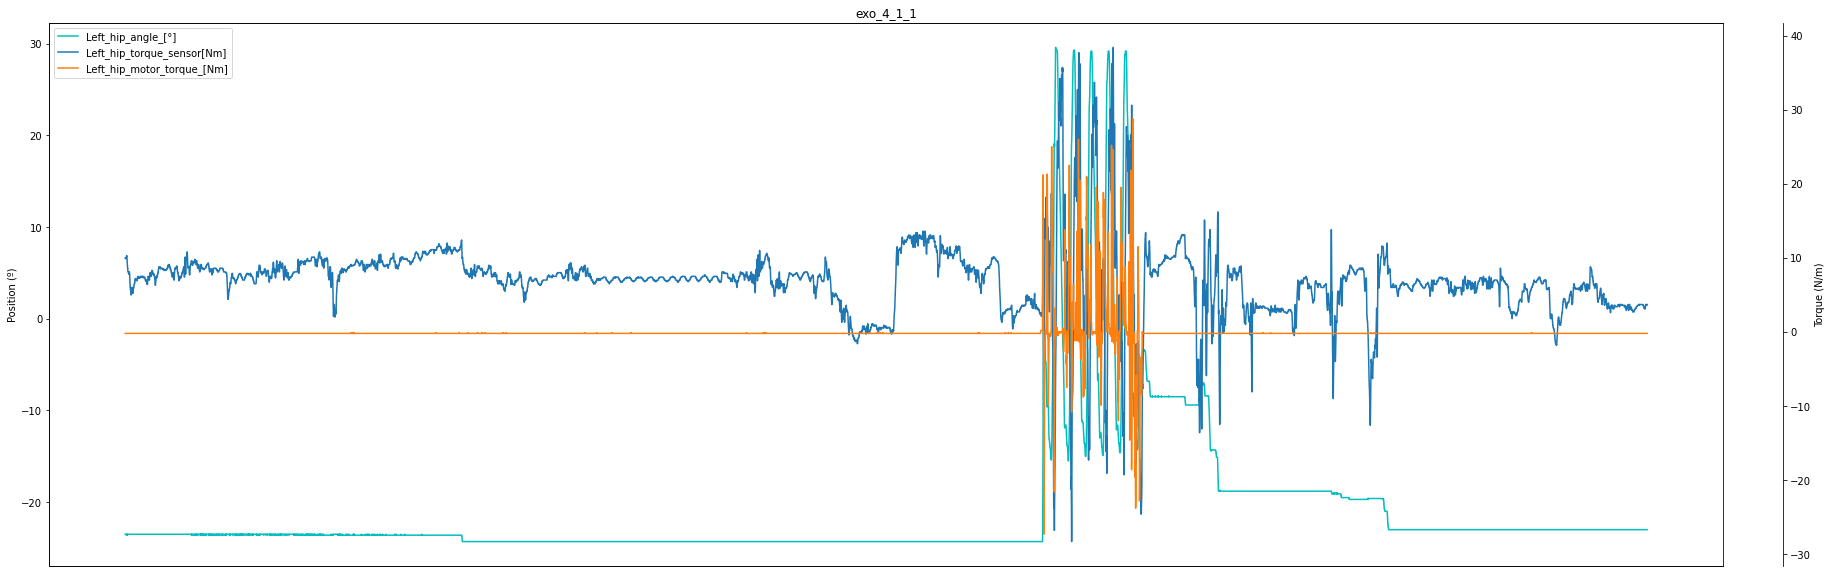

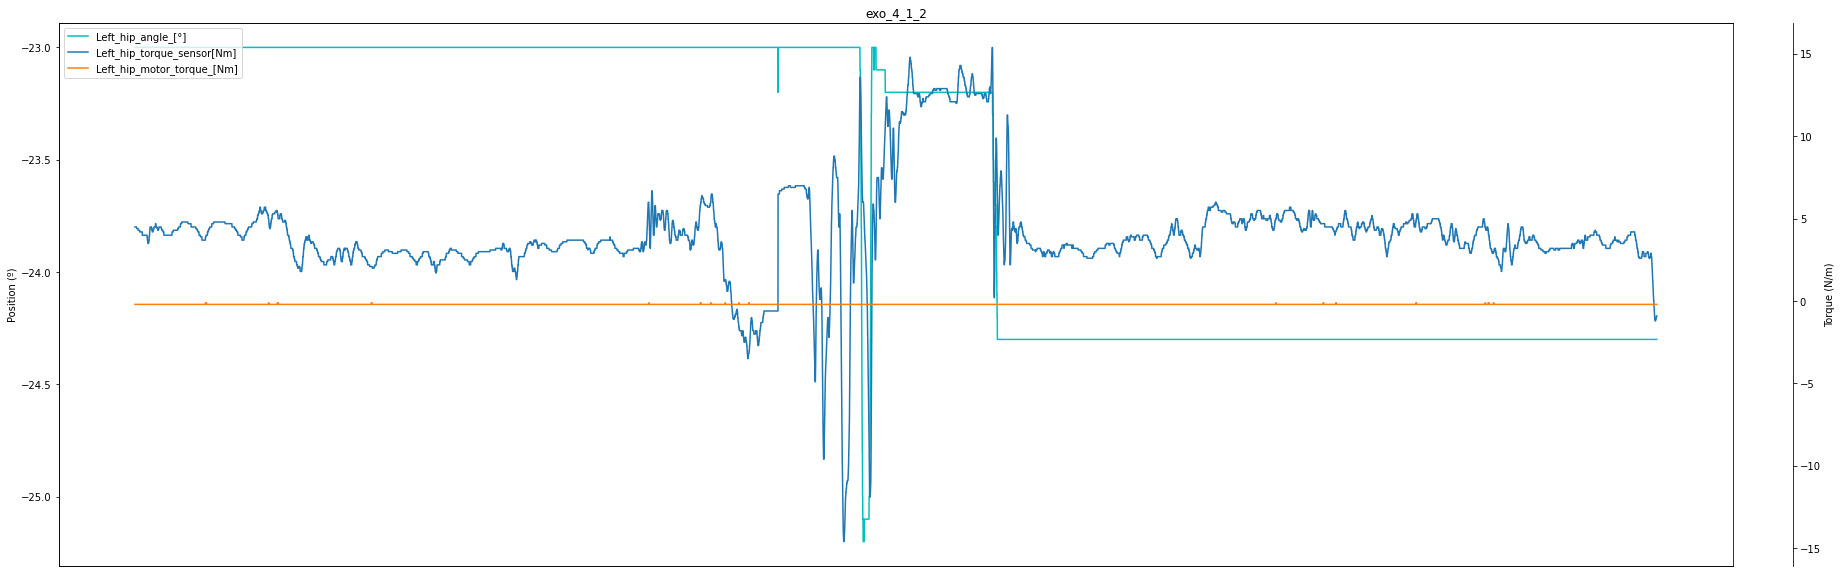

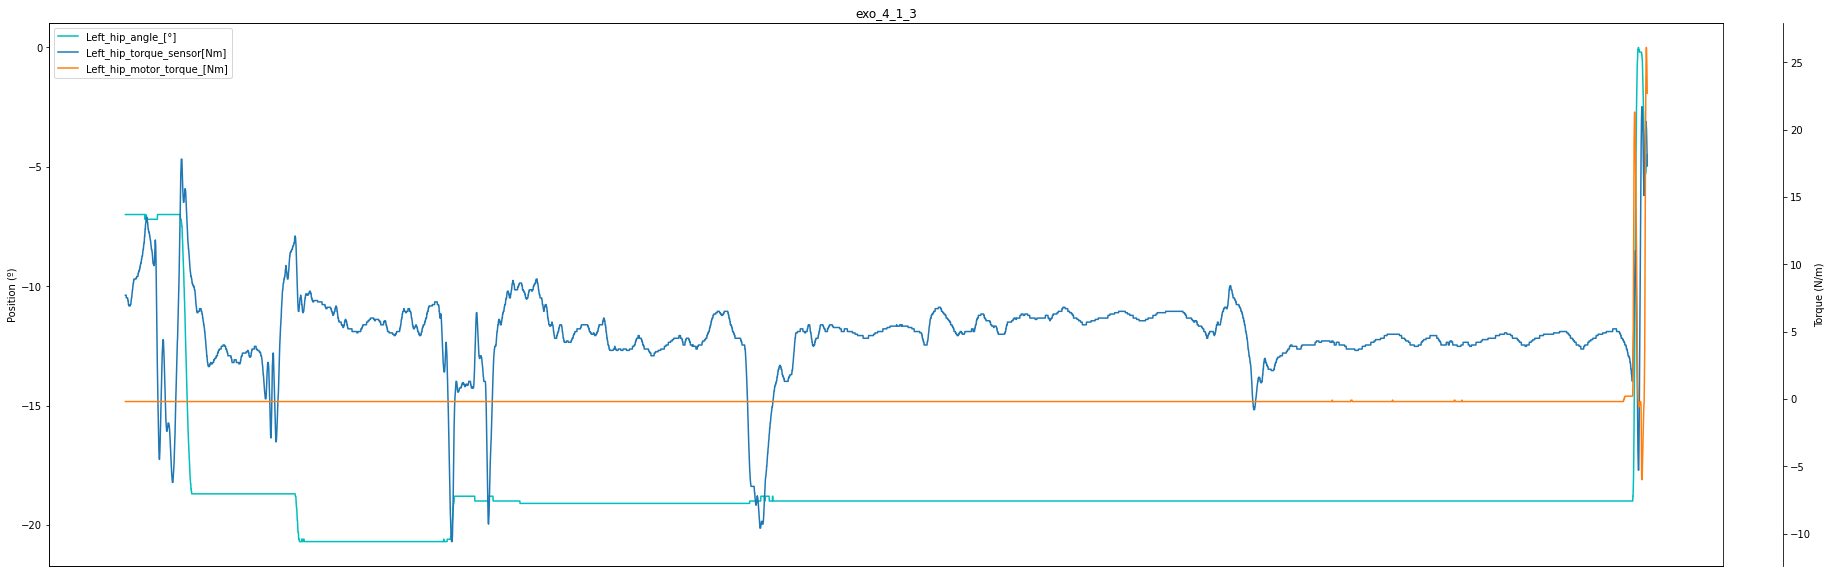

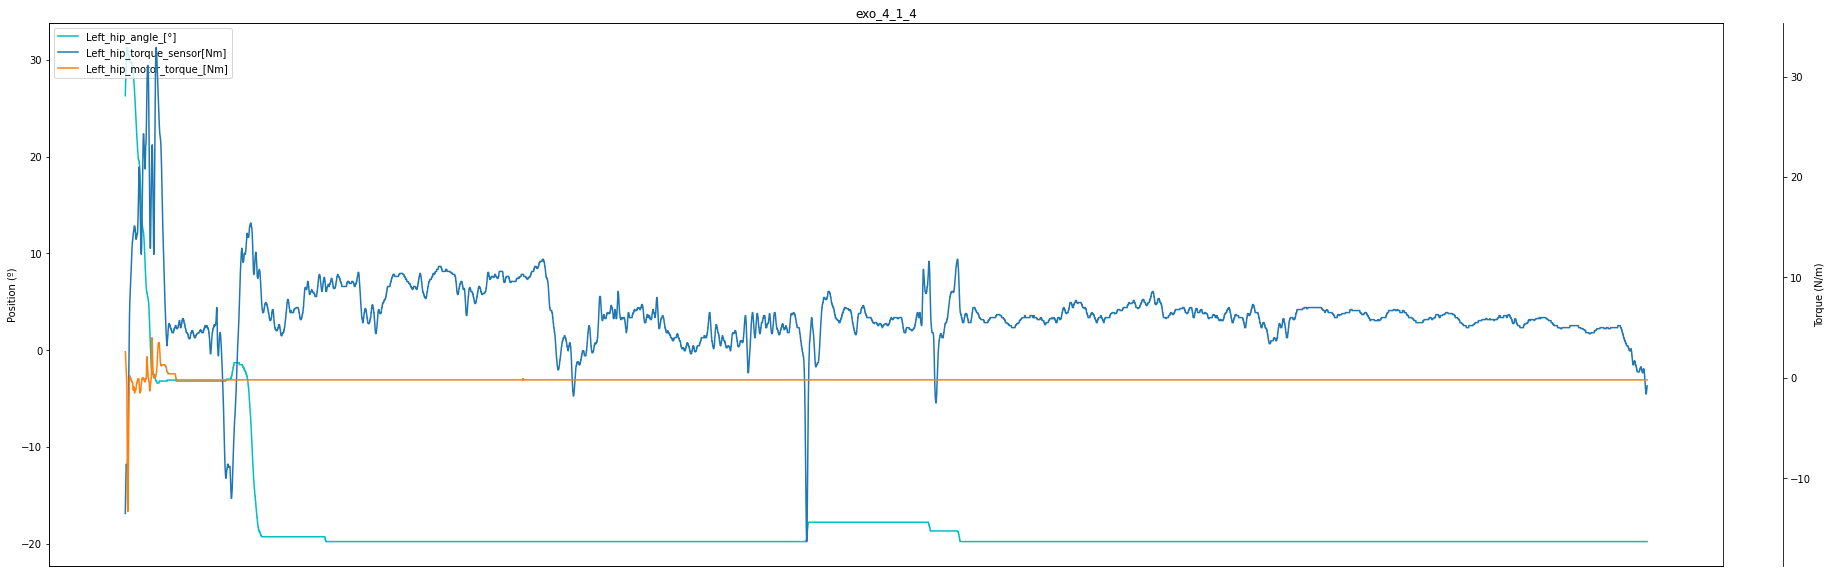

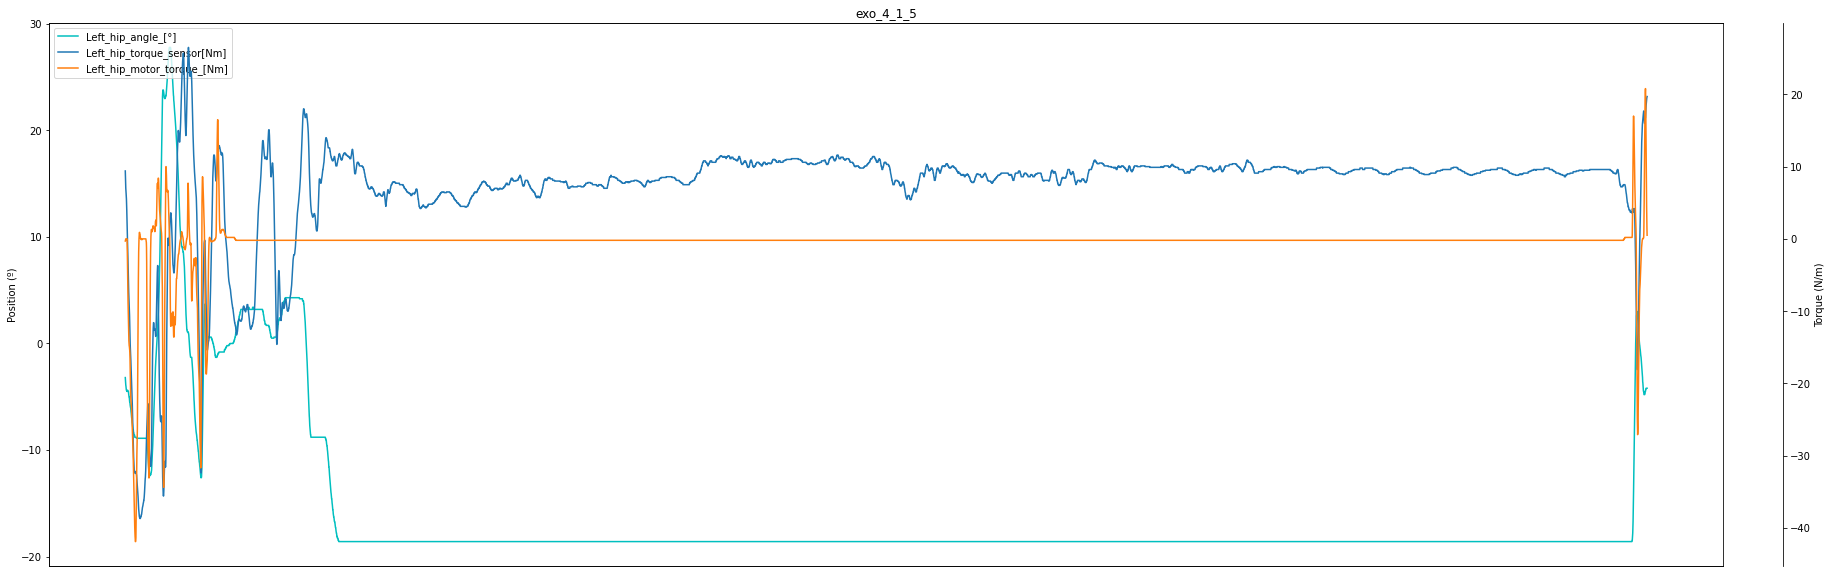

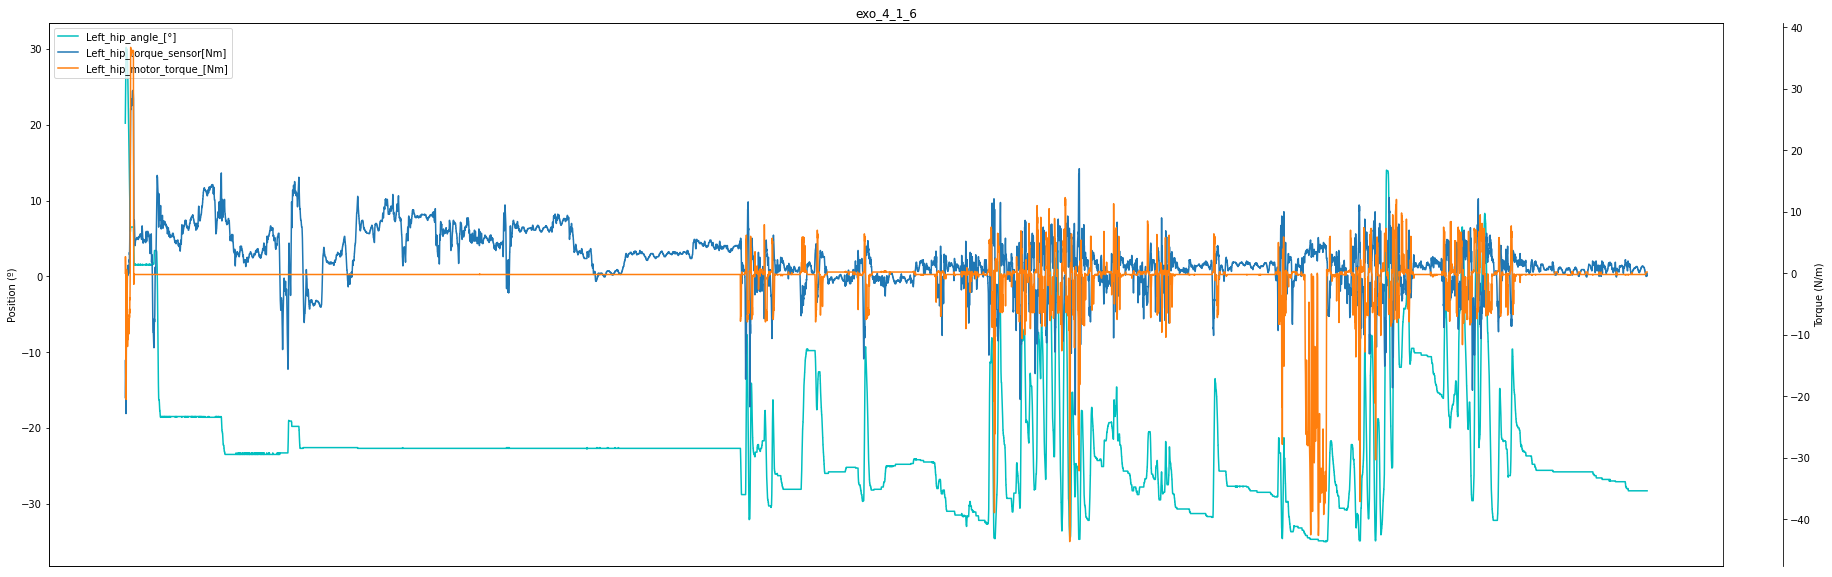

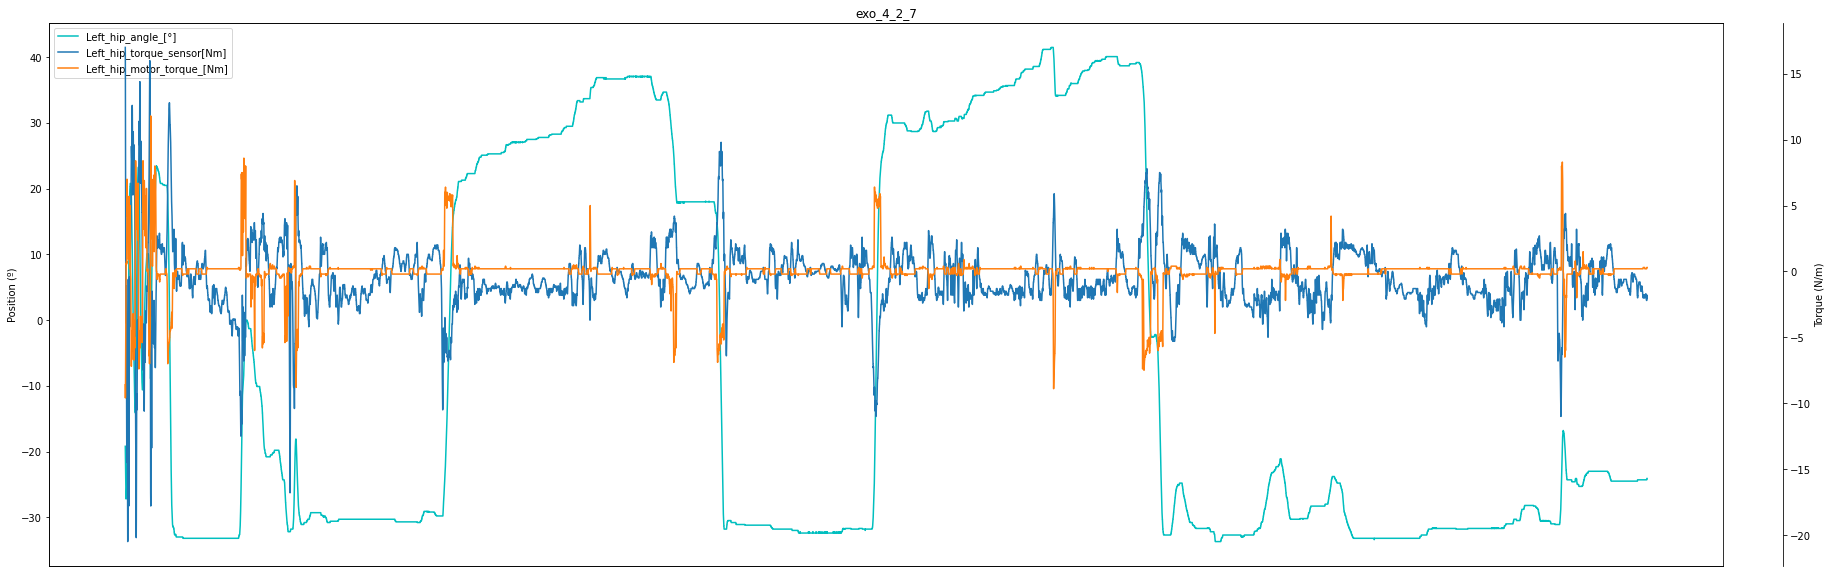

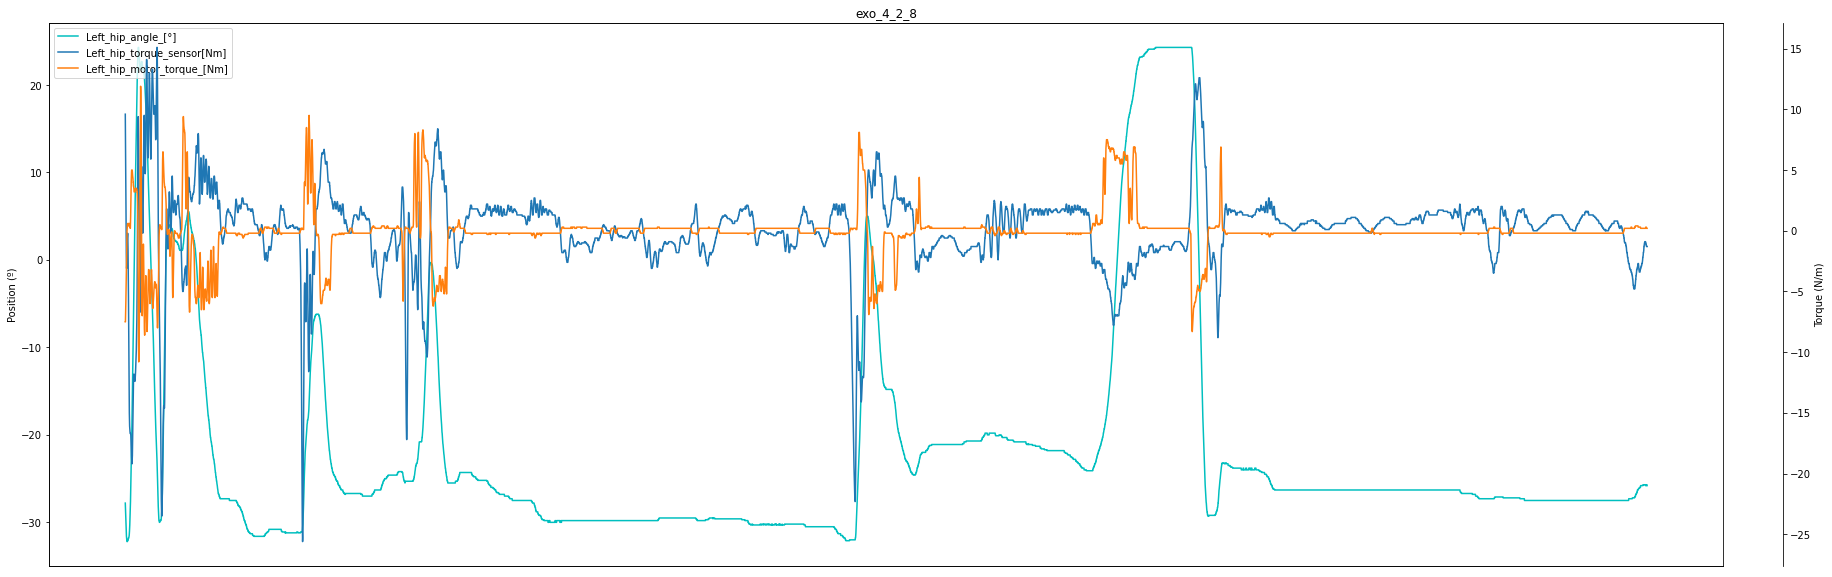

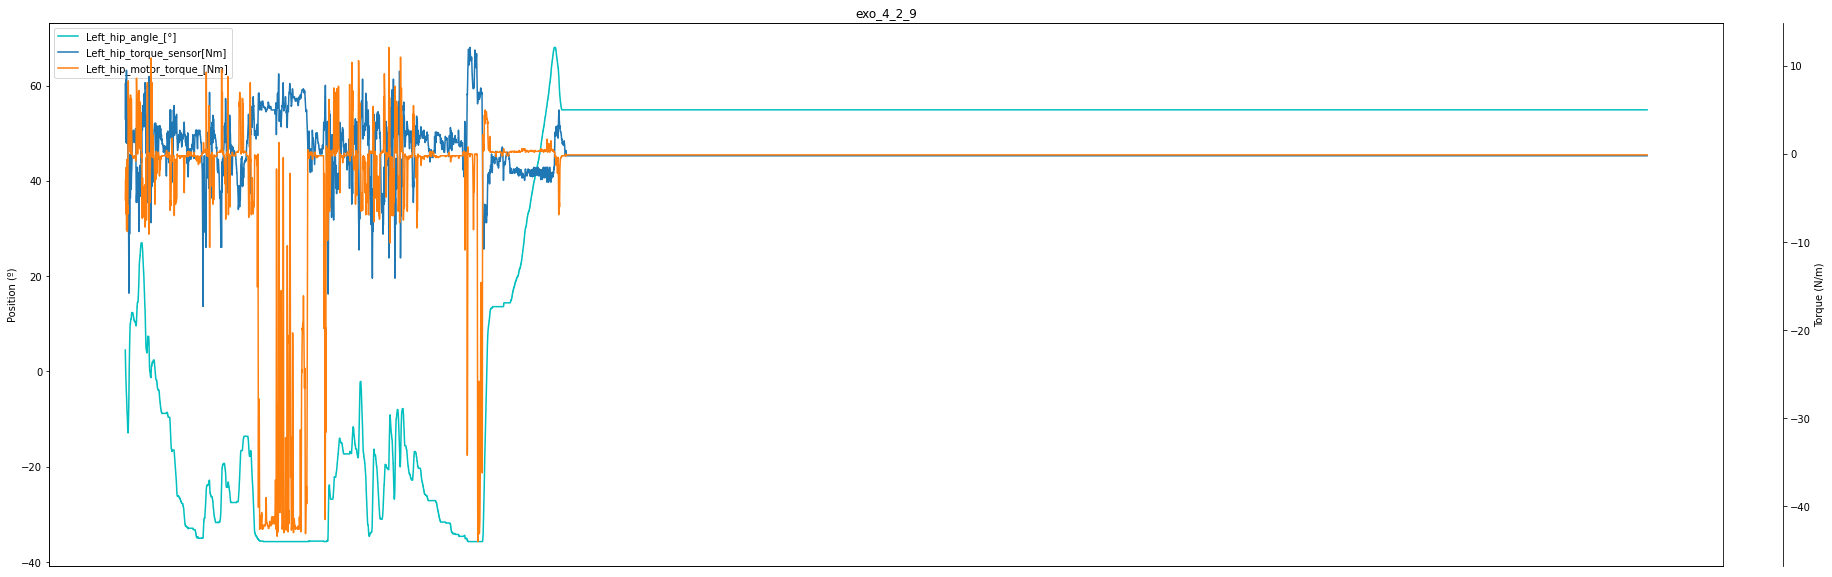

In [19]:
for f in files:
    df = pd.read_csv(f, header=2, index_col=False)
    
    # Plot hip signals
    fig, ax1 = plt.subplots(figsize=(30,10))

    ax2 = ax1.twinx()

    ax2.spines['right'].set_position(('outward', 60))
    ax2.xaxis.set_ticks([])

    lns1 = ax1.plot(df['Left_hip_angle_[°]'], label='Left_hip_angle_[°]', c='c')

    lns2 = ax2.plot(df['Left_hip_torque_sensor[Nm]'], label='Left_hip_torque_sensor[Nm]')
    lns3 = ax2.plot(df['Left_hip_motor_torque_[Nm]'], label='Left_hip_motor_torque_[Nm]')

    ax1.set_ylabel('Position (º)')
    ax2.set_ylabel('Torque (N/m)')
    plt.title(f.split('/')[-1].replace('.csv', ''))

    lns = lns1 + lns2 + lns3
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc='upper left')

    plt.savefig(DATA_DIR + '/figures/{}_hip.png'.format(f.split('/')[-1].replace('.csv', '')))
    
    plt.show()

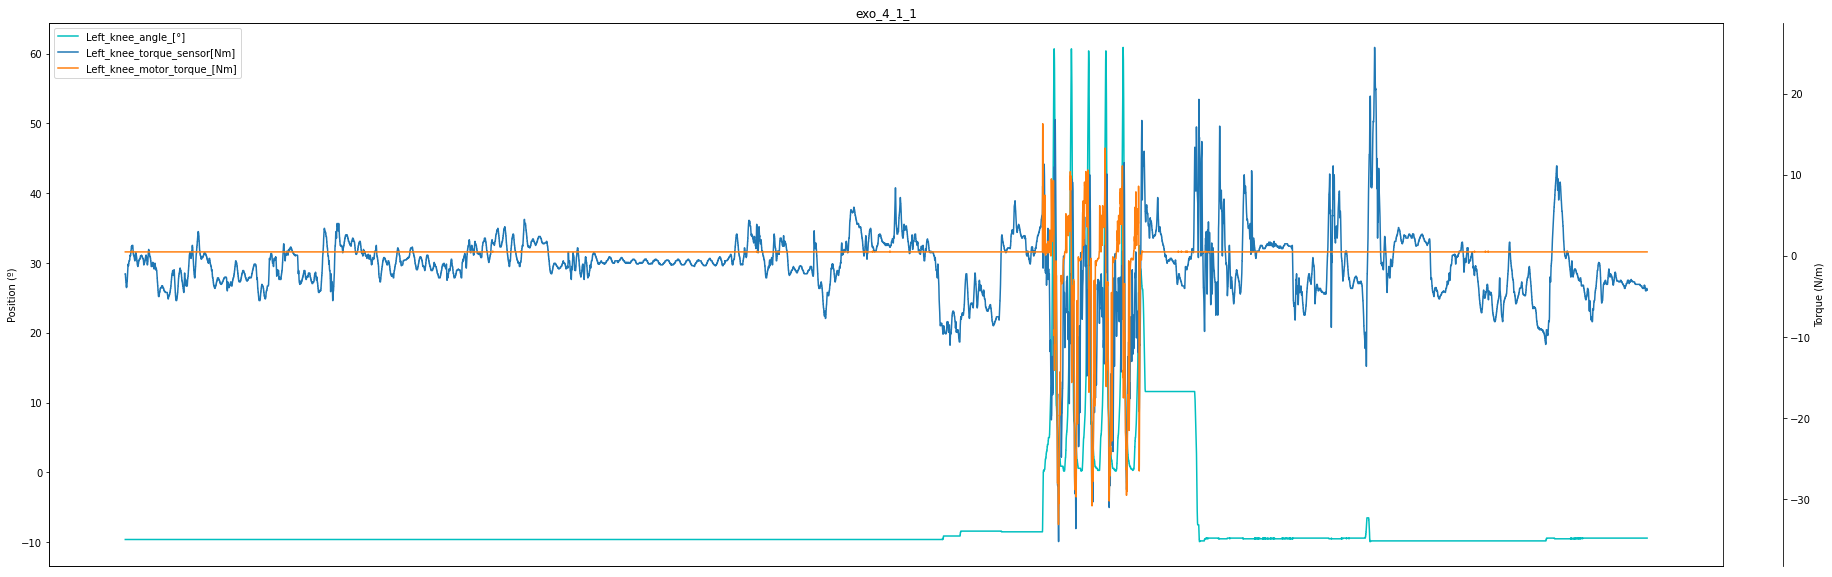

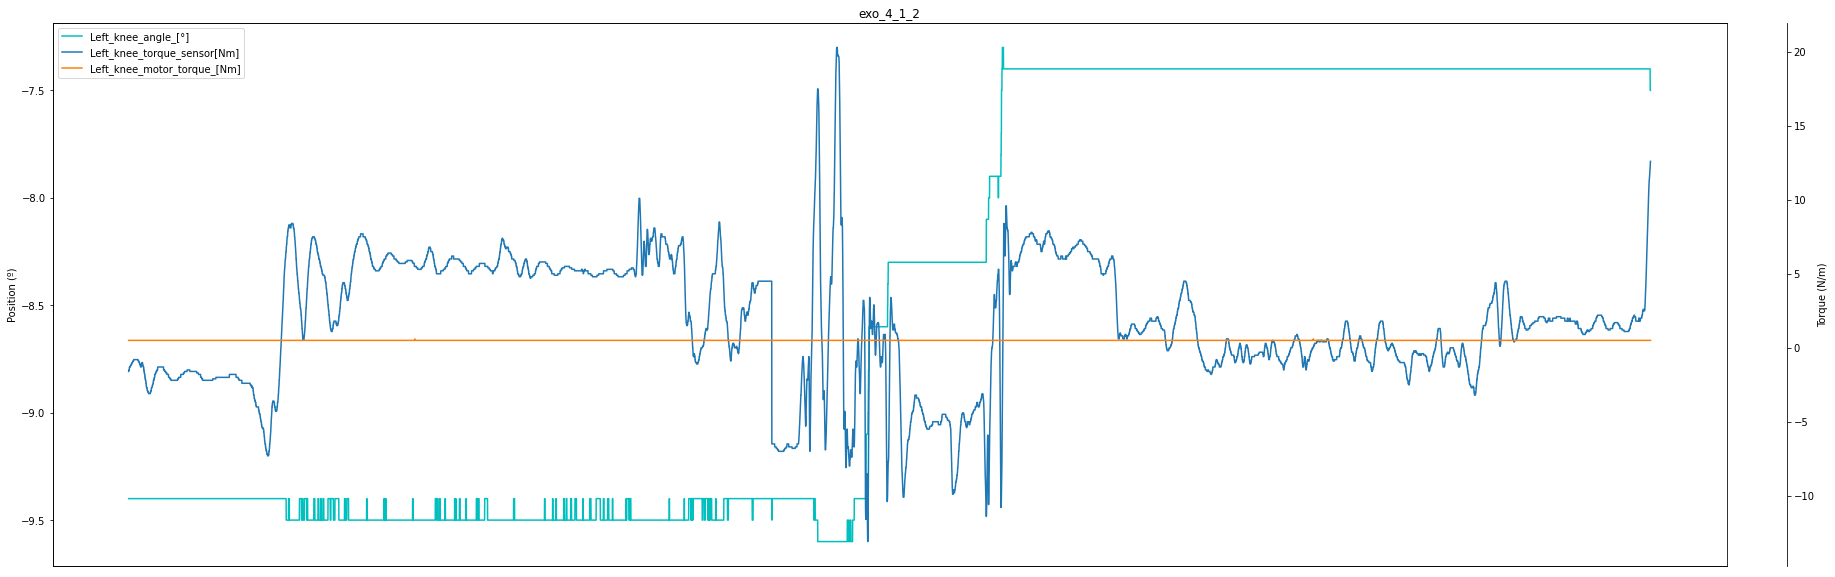

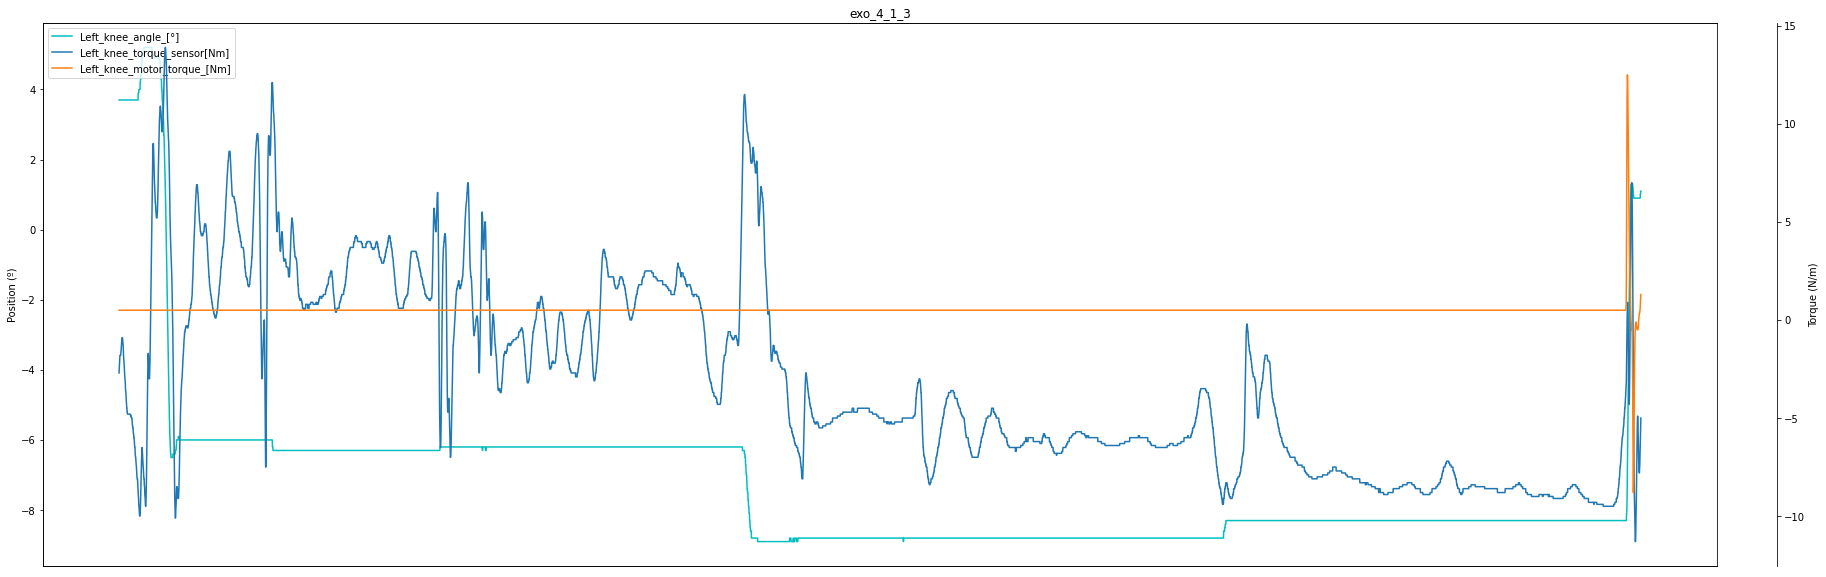

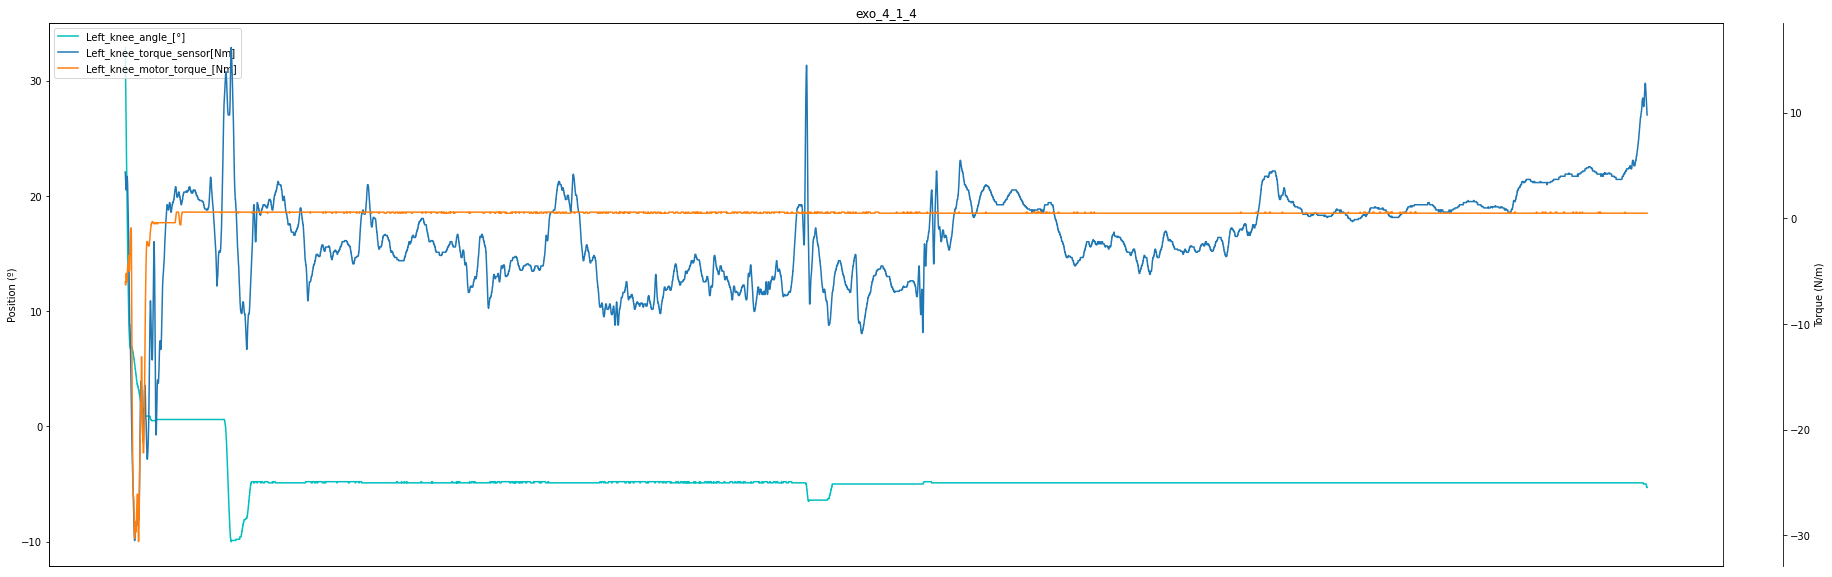

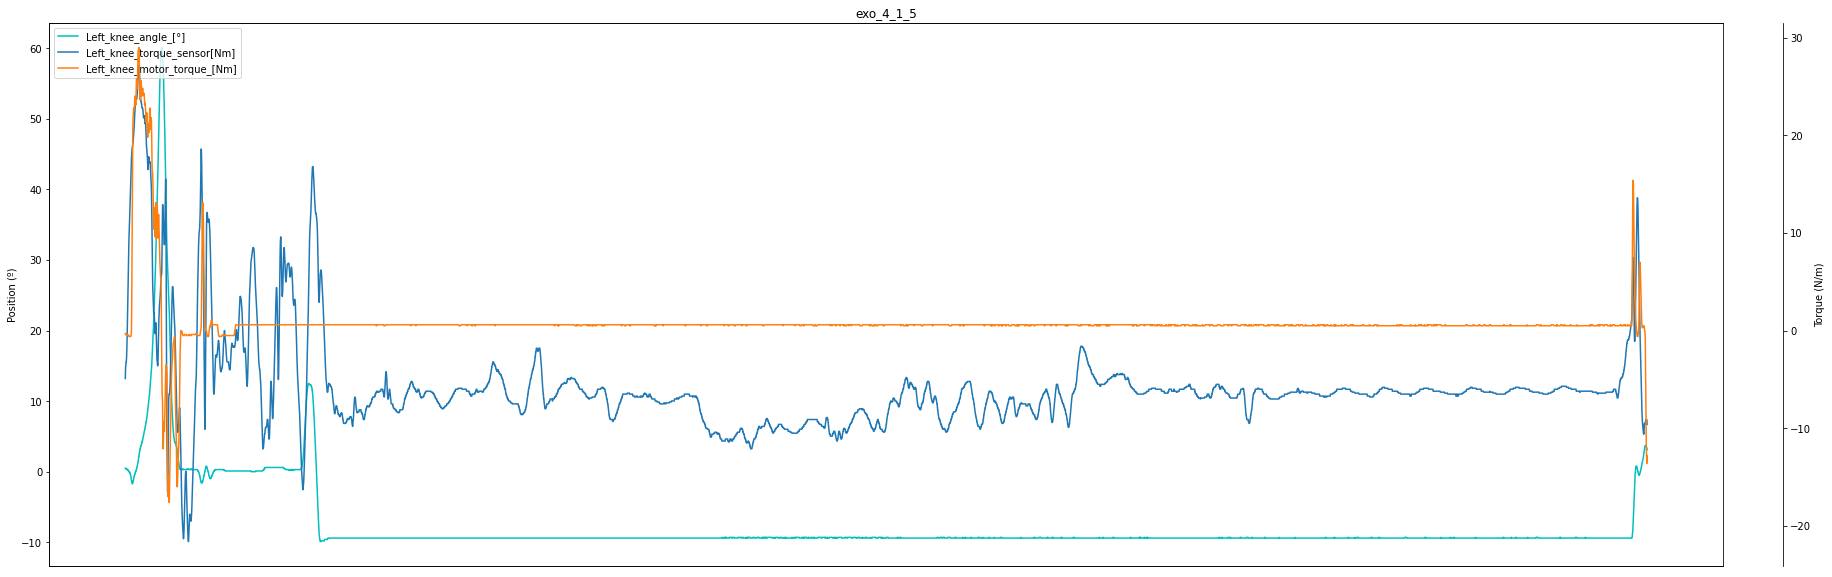

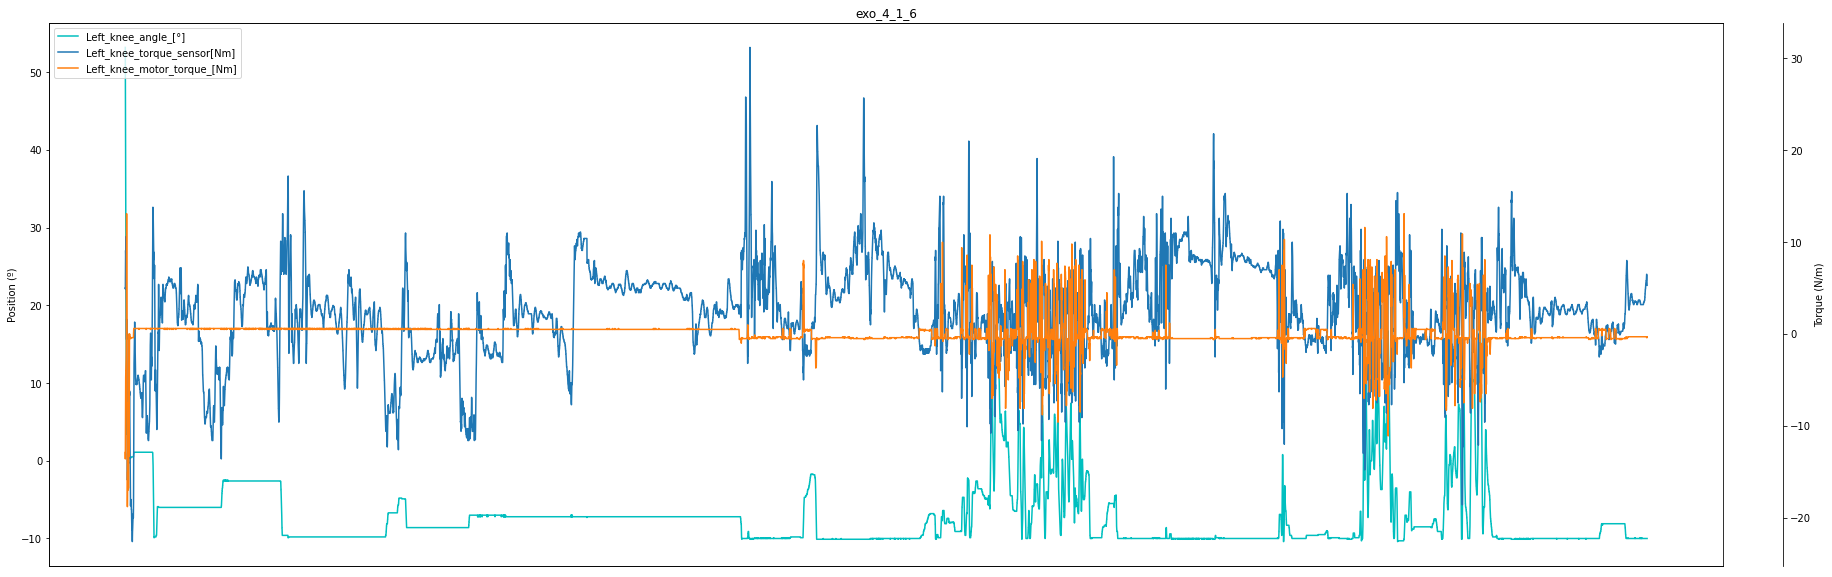

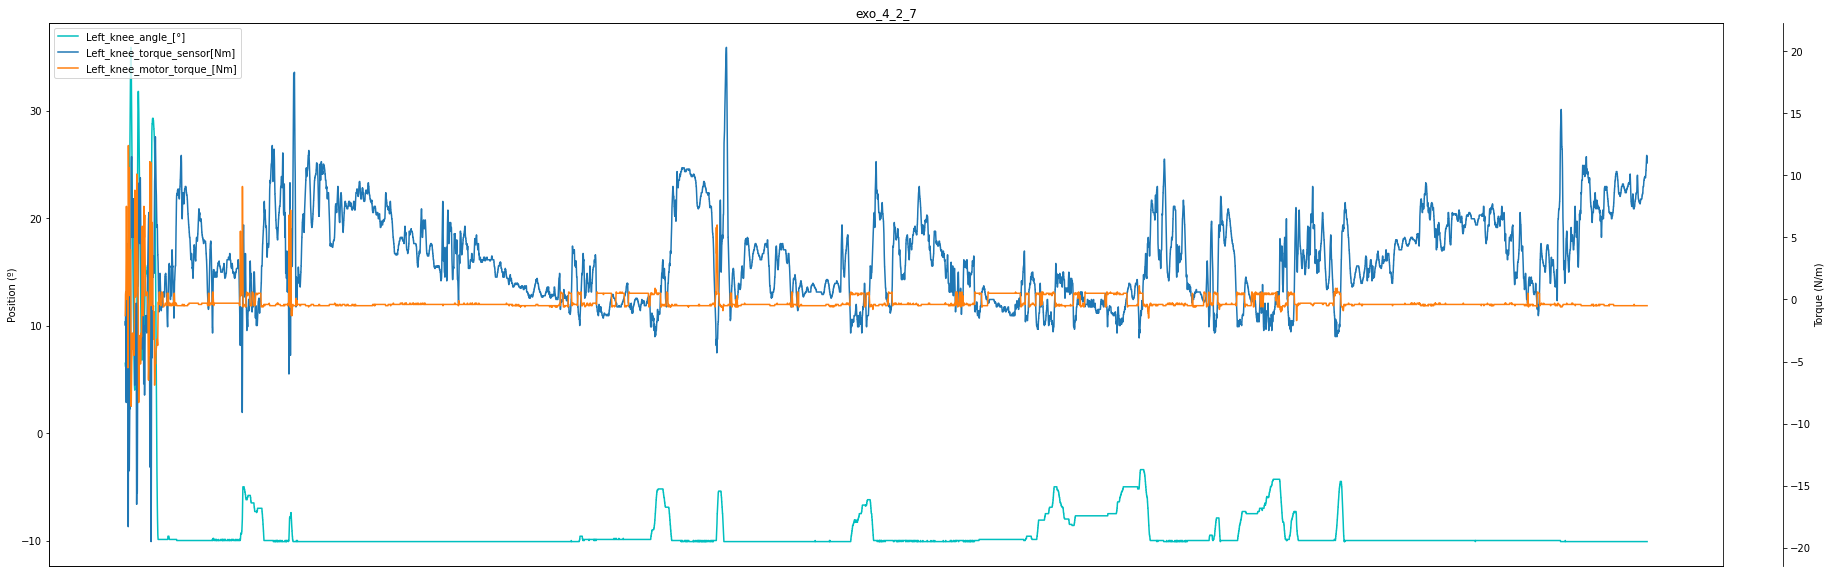

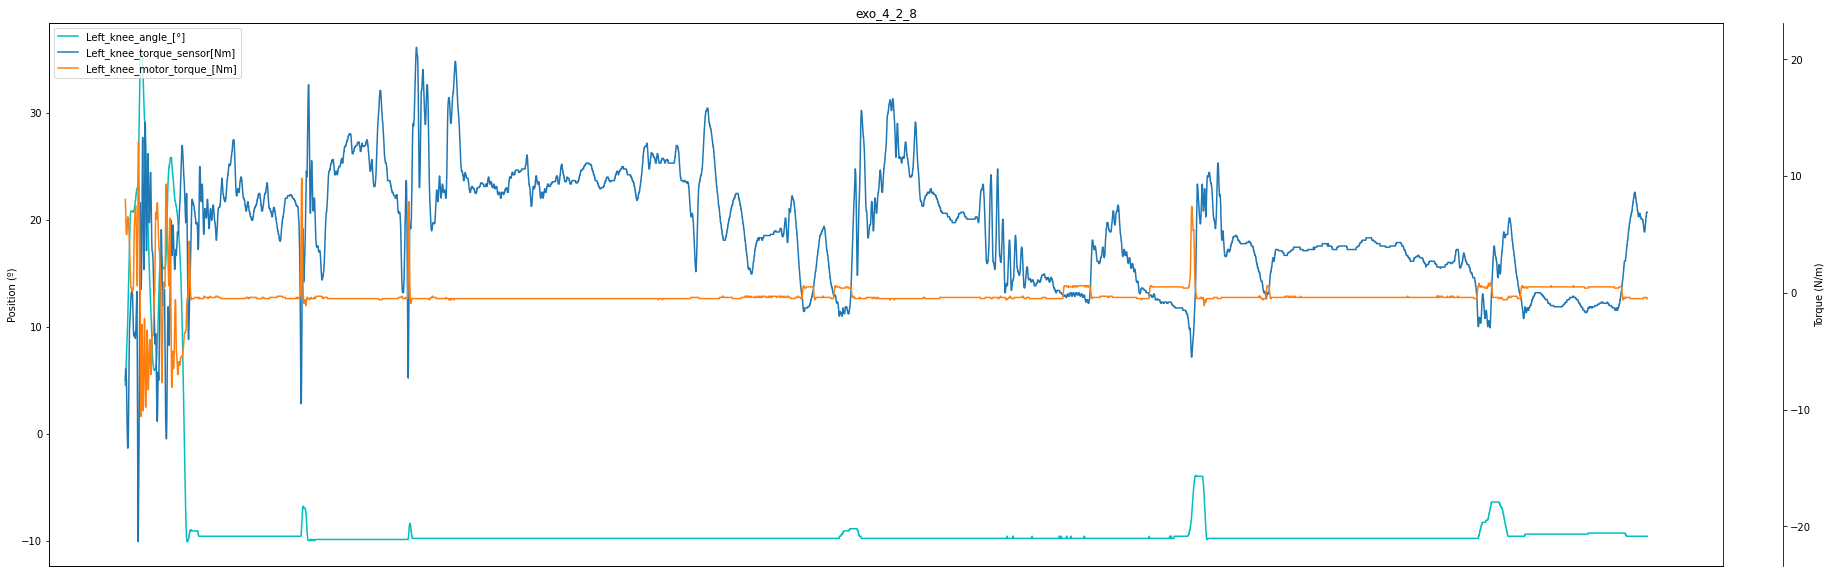

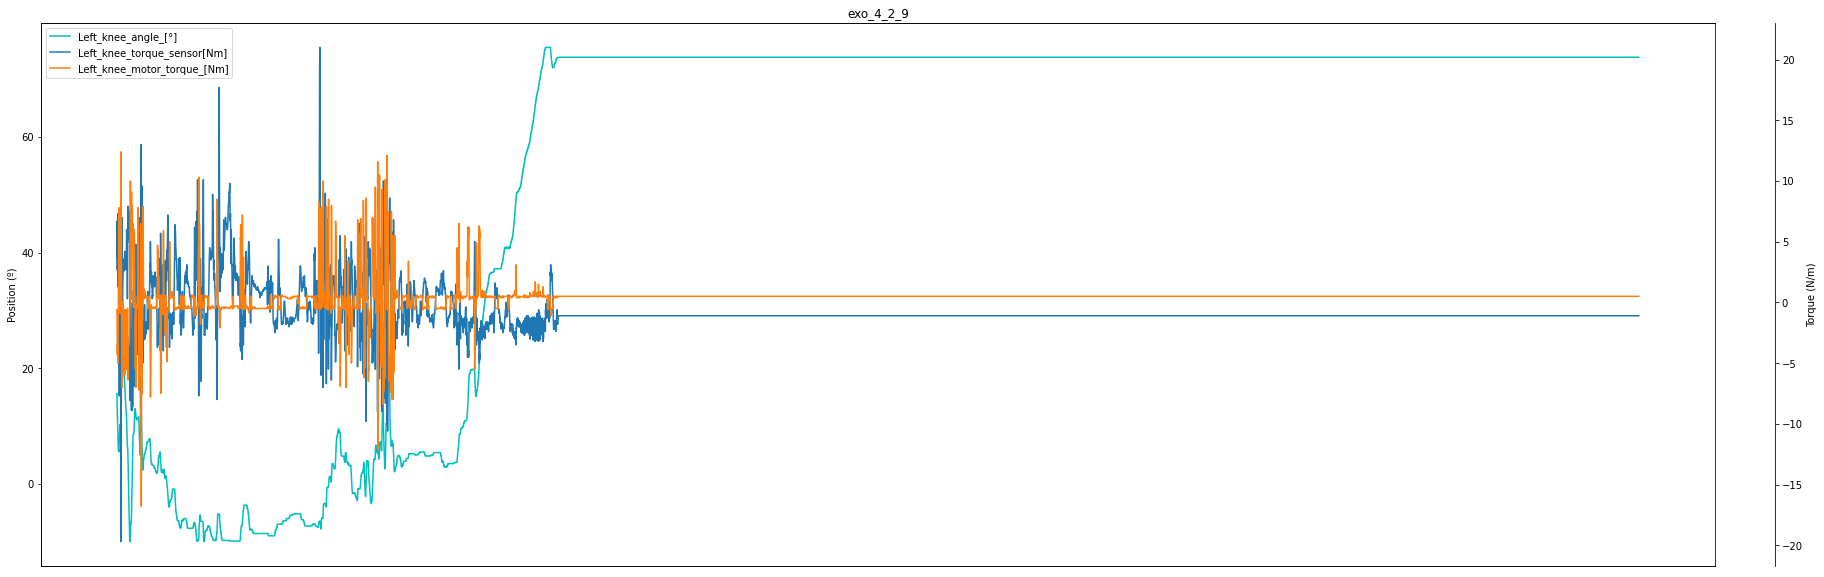

In [20]:
for f in files:
    df = pd.read_csv(f, header=2, index_col=False)
    
    # Plot hip signals
    fig, ax1 = plt.subplots(figsize=(30,10))

    ax2 = ax1.twinx()

    ax2.spines['right'].set_position(('outward', 60))
    ax2.xaxis.set_ticks([])

    lns1 = ax1.plot(df['Left_knee_angle_[°]'], label='Left_knee_angle_[°]', c='c')

    lns2 = ax2.plot(df['Left_knee_torque_sensor[Nm]'], label='Left_knee_torque_sensor[Nm]')
    lns3 = ax2.plot(df['Left_knee_motor_torque_[Nm]'], label='Left_knee_motor_torque_[Nm]')

    ax1.set_ylabel('Position (º)')
    ax2.set_ylabel('Torque (N/m)')
    plt.title(f.split('/')[-1].replace('.csv', ''))

    lns = lns1 + lns2 + lns3
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc='upper left')

    plt.savefig(DATA_DIR + '/figures/{}_knee.png'.format(f.split('/')[-1].replace('.csv', '')))
    
    plt.show()